<a href="https://colab.research.google.com/github/EML-Labs/VitalsTrack-Testing/blob/main/WARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb==4.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!wget -r -N -c -np https://physionet.org/files/afdb/1.0.0/

--2025-05-28 05:22:29--  https://physionet.org/files/afdb/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/afdb/1.0.0/index.html’

physionet.org/files     [ <=>                ]  14.93K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-05-28 05:22:29 (285 MB/s) - ‘physionet.org/files/afdb/1.0.0/index.html’ saved [15284]

Loading robots.txt; please ignore errors.
--2025-05-28 05:22:29--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2025-05-28 05:22:29 (16.4 MB/s) - ‘physionet.org/robots.txt’ saved [22/22]

--2025-05-28 05:22:29-- 

In [ ]:
import wfdb

# Download record '00735' from the MIT-BIH Atrial Fibrillation Database
wfdb.dl_database('afdb', dl_dir='afdb', records=['00735'])


Generating record list for: 00735
Generating list of all files for: 00735
Created local base download directory: afdb
Finished downloading files


In [ ]:
!wget -r -N -c -np https://physionet.org/files/afpdb/1.0.0/

Streaming output truncated to the last 5000 lines.
Length: 101 [text/plain]
Saving to: ‘physionet.org/files/afpdb/1.0.0/p18.hea’

physionet.org/files 100%[===================>]     101  --.-KB/s    in 0s      

2025-05-30 03:45:10 (74.2 MB/s) - ‘physionet.org/files/afpdb/1.0.0/p18.hea’ saved [101/101]

--2025-05-30 03:45:10--  https://physionet.org/files/afpdb/1.0.0/p18.qrs
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 3708 (3.6K) [application/octet-stream]
Saving to: ‘physionet.org/files/afpdb/1.0.0/p18.qrs’

physionet.org/files 100%[===================>]   3.62K  --.-KB/s    in 0s      

2025-05-30 03:45:10 (1.07 GB/s) - ‘physionet.org/files/afpdb/1.0.0/p18.qrs’ saved [3708/3708]

--2025-05-30 03:45:10--  https://physionet.org/files/afpdb/1.0.0/p18c.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 153600 (150K) [application/octet-stream]
Saving to: ‘physionet.org/fil

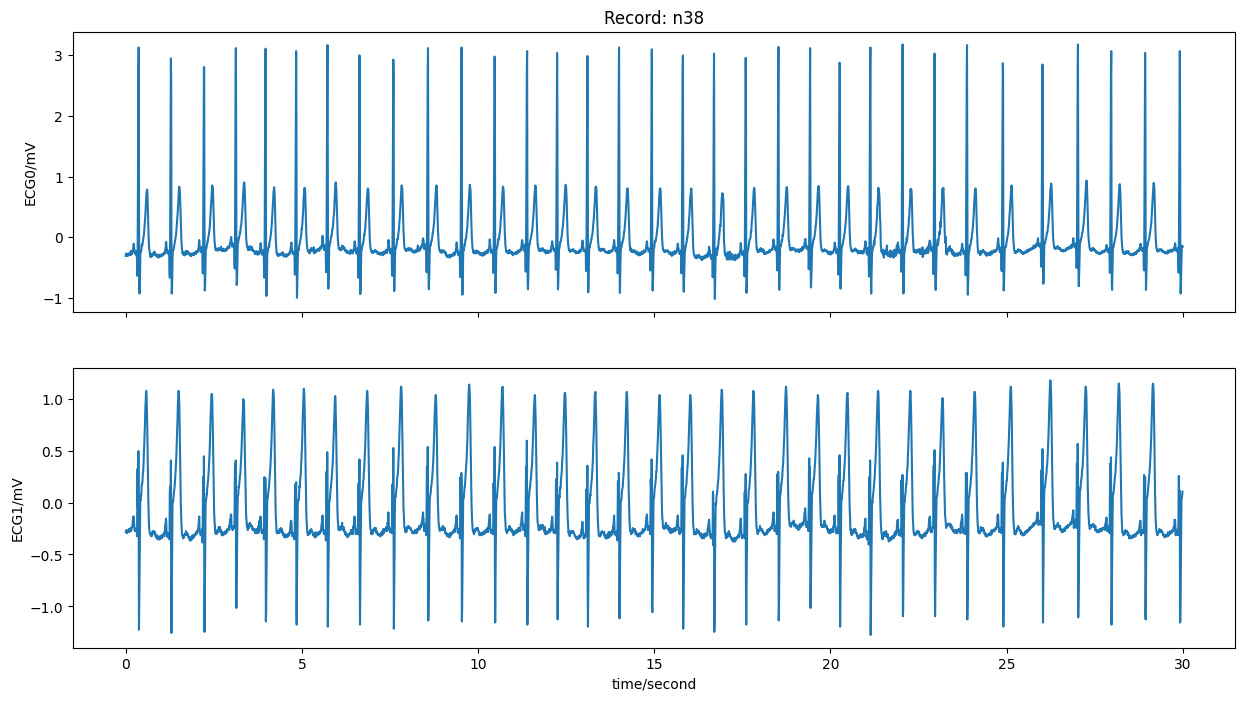

In [ ]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

file = "/content/physionet.org/files/afpdb/1.0.0/n38"
record = wfdb.rdrecord(file, sampfrom=1000, sampto=4840,)
annotation = wfdb.rdann(file, 'qrs', sampfrom=1000, sampto=4840,shift_samps=True)
wfdb.plot_wfdb(record=record, time_units='seconds', figsize=(15,8))


In [ ]:
class Pan_Tompkins_QRS():

  def band_pass_filter(self,signal):
    '''
    Band Pass Filter
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    Bandpass filter is used to attenuate the noise in the input signal.
    To acheive a passband of 5-15 Hz, the input signal is first passed
    through a low pass filter having a cutoff frequency of 11 Hz and then
    through a high pass filter with a cutoff frequency of 5 Hz, thus
    achieving the required thresholds.

    The low pass filter has the recursive equation:
      y(nT) = 2y(nT - T) - y(nT - 2T) + x(nT) - 2x(nT - 6T) + x(nT - 12T)

    The high pass filter has the recursive equation:
      y(nT) = 32x(nT - 16T) - y(nT - T) - x(nT) + x(nT - 32T)
    '''

    # Initialize result
    result = None

    # Create a copy of the input signal
    sig = signal.copy()

    # Apply the low pass filter using the equation given
    for index in range(len(signal)):
      sig[index] = signal[index]

      if (index >= 1):
        sig[index] += 2*sig[index-1]

      if (index >= 2):
        sig[index] -= sig[index-2]

      if (index >= 6):
        sig[index] -= 2*signal[index-6]

      if (index >= 12):
        sig[index] += signal[index-12]

    # Copy the result of the low pass filter
    result = sig.copy()

    # Apply the high pass filter using the equation given
    for index in range(len(signal)):
      result[index] = -1*sig[index]

      if (index >= 1):
        result[index] -= result[index-1]

      if (index >= 16):
        result[index] += 32*sig[index-16]

      if (index >= 32):
        result[index] += sig[index-32]

    # Normalize the result from the high pass filter
    max_val = max(max(result),-min(result))
    result = result/max_val

    return result

  def derivative(self,signal):
    '''
    Derivative Filter
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The derivative of the input signal is taken to obtain the
    information of the slope of the signal. Thus, the rate of change
    of input is obtain in this step of the algorithm.

    The derivative filter has the recursive equation:
      y(nT) = [-x(nT - 2T) - 2x(nT - T) + 2x(nT + T) + x(nT + 2T)]/(8T)
    '''

    # Initialize result
    result = signal.copy()

    # Apply the derivative filter using the equation given
    for index in range(len(signal)):
      result[index] = 0

      if (index >= 1):
        result[index] -= 2*signal[index-1]

      if (index >= 2):
        result[index] -= signal[index-2]

      if (index >= 2 and index <= len(signal)-2):
        result[index] += 2*signal[index+1]

      if (index >= 2 and index <= len(signal)-3):
        result[index] += signal[index+2]

      result[index] = (result[index]*annotation.fs)/8

    return result

  def squaring(self,signal):
    '''
    Squaring the Signal
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The squaring process is used to intensify the slope of the
    frequency response curve obtained in the derivative step. This
    step helps in restricting false positives which may be caused
    by T waves in the input signal.

    The squaring filter has the recursive equation:
      y(nT) = [x(nT)]^2
    '''

    # Initialize result
    result = signal.copy()

    # Apply the squaring using the equation given
    for index in range(len(signal)):
      result[index] = signal[index]**2

    return result

  def moving_window_integration(self,signal):
    '''
    Moving Window Integrator
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The moving window integration process is done to obtain
    information about both the slope and width of the QRS complex.
    A window size of 0.15*(sample frequency) is used for more
    accurate results.

    The moving window integration has the recursive equation:
      y(nT) = [y(nT - (N-1)T) + x(nT - (N-2)T) + ... + x(nT)]/N

      where N is the number of samples in the width of integration
      window.
    '''

    # Initialize result and window size for integration
    result = signal.copy()
    win_size = round(0.150 * annotation.fs)
    sum = 0

    # Calculate the sum for the first N terms
    for j in range(win_size):
      sum += signal[j]/win_size
      result[j] = sum

    # Apply the moving window integration using the equation given
    for index in range(win_size,len(signal)):
      sum += signal[index]/win_size
      sum -= signal[index-win_size]/win_size
      result[index] = sum

    return result

  def solve(self,signal):
    '''
    Solver, Combines all the above functions
    :param signal: input signal
    :return: prcoessed signal

    Methodology/Explaination:
    The peak detection algorithm works on the moving window and bandpass
    filtered signal. So the input signal is first bandpassed, then the
    output of the bandpass filter is given to the derivative function and
    the result is squared. Finally the output of the squaring function
    is given to the moving window integration function and returned.
    '''

    # Convert the input signal into numpy array
    input_signal = signal.iloc[:,1].to_numpy()

    # Bandpass Filter
    global bpass
    bpass = self.band_pass_filter(input_signal.copy())

    # Derivative Function
    global der
    der = self.derivative(bpass.copy())

    # Squaring Function
    global sqr
    sqr = self.squaring(der.copy())

    # Moving Window Integration Function
    global mwin
    mwin = self.moving_window_integration(sqr.copy())

    return mwin

QRS_detector = Pan_Tompkins_QRS()
ecg = pd.DataFrame(np.array([list(range(len(record.adc()))),record.adc()[:,0]]).T,columns=['TimeStamp','ecg'])
output_singal = QRS_detector.solve(ecg)

Text(0.5, 1.0, 'Moving Window Integrated Signal')

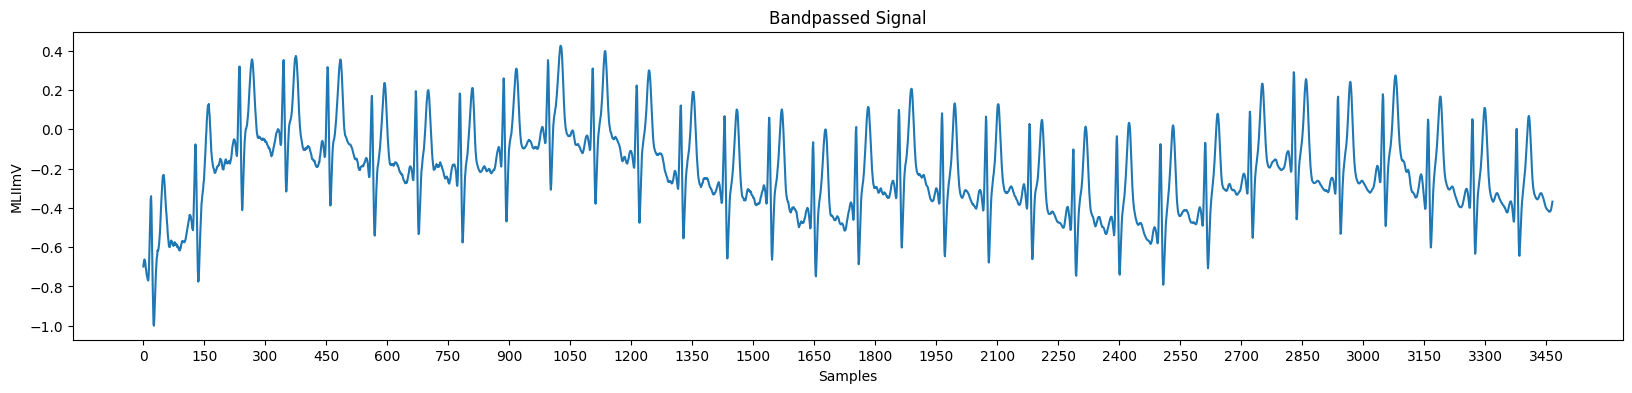

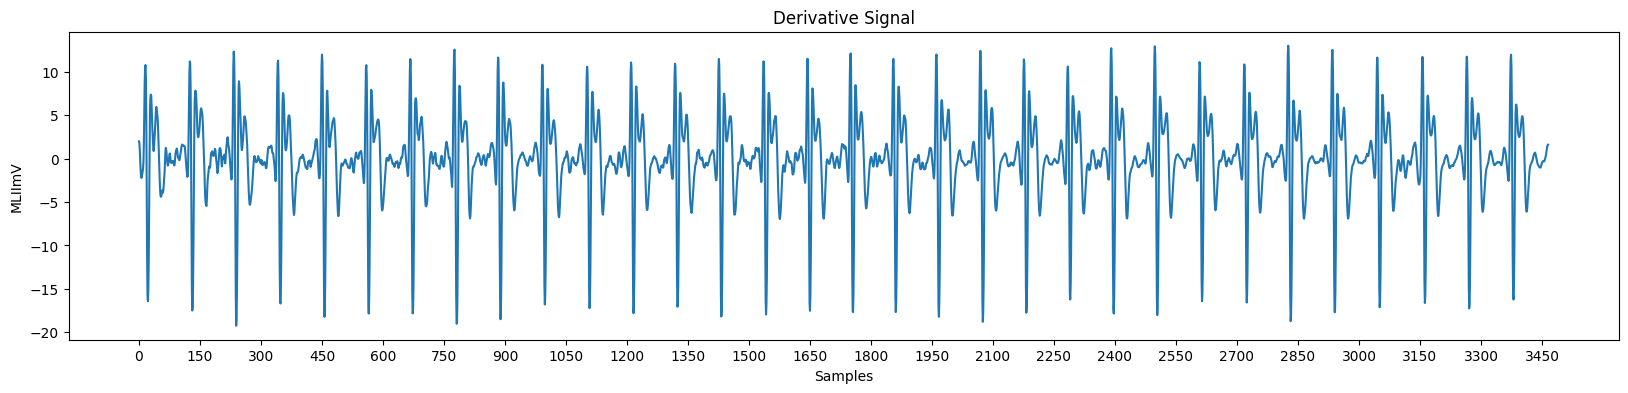

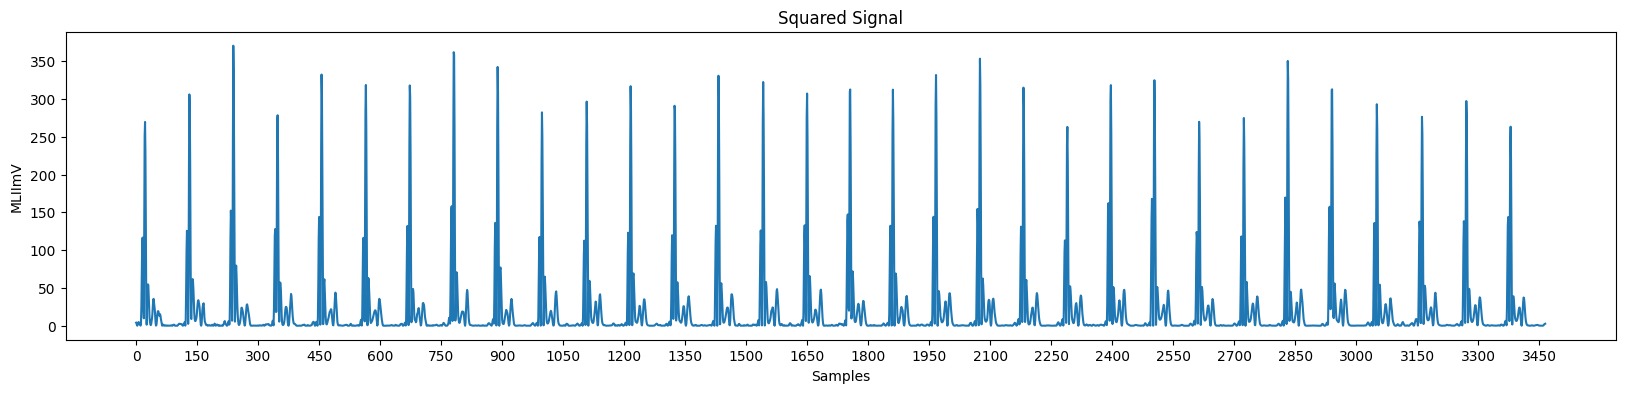

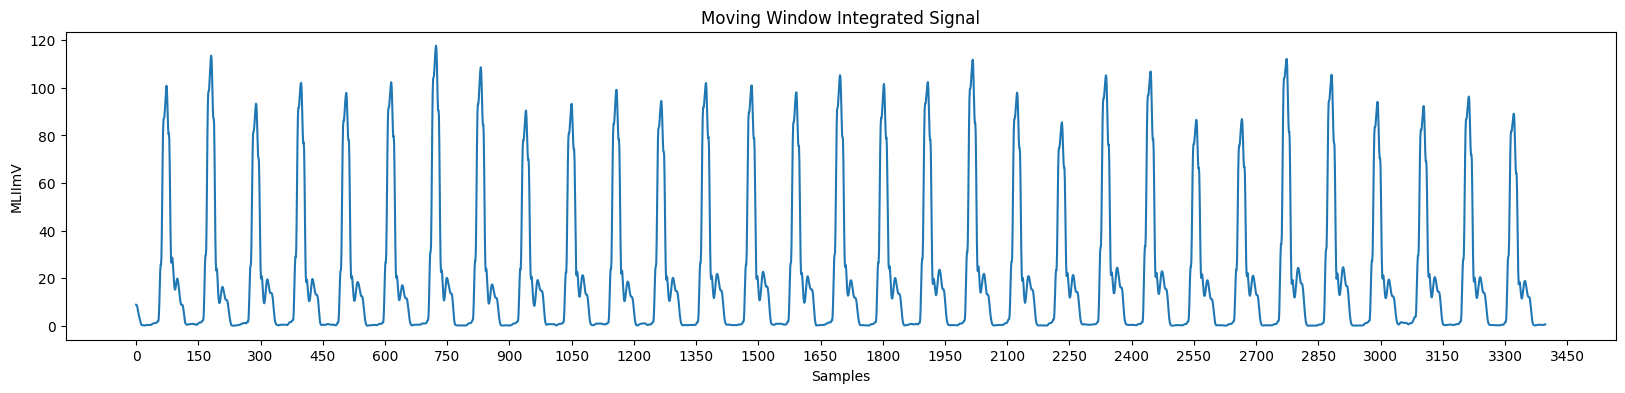

In [ ]:
# Plotting bandpassed signal
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(bpass)+1, 150))
plt.plot(bpass[32:len(bpass)-2])
plt.xlabel('Samples')
plt.ylabel('MLIImV')
plt.title("Bandpassed Signal")

# Plotting derived signal
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(der)+1, 150))
plt.plot(der[32:len(der)-2])
plt.xlabel('Samples')
plt.ylabel('MLIImV')
plt.title("Derivative Signal")

# Plotting squared signal
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(sqr)+1, 150))
plt.plot(sqr[32:len(sqr)-2])
plt.xlabel('Samples')
plt.ylabel('MLIImV')
plt.title("Squared Signal")

# Plotting moving window integrated signal
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(mwin)+1, 150))
plt.plot(mwin[100:len(mwin)-2])
plt.xlabel('Samples')
plt.ylabel('MLIImV')
plt.title("Moving Window Integrated Signal")

In [ ]:
# Importing Libraries
from scipy import signal as sg

class heart_rate():

  def __init__(self,signal,samp_freq):
    '''
    Initialize Variables
    :param signal: input signal
    :param samp_freq: sample frequency of input signal
    '''

    # Initialize variables
    self.RR1, self.RR2, self.probable_peaks, self.r_locs, self.peaks, self.result = ([] for i in range(6))
    self.SPKI, self.NPKI, self.Threshold_I1, self.Threshold_I2, self.SPKF, self.NPKF, self.Threshold_F1, self.Threshold_F2 = (0 for i in range(8))

    self.T_wave = False
    self.m_win = mwin
    self.b_pass = bpass
    self.samp_freq = samp_freq
    self.signal = signal
    self.win_150ms = round(0.15*self.samp_freq)

    self.RR_Low_Limit = 0
    self.RR_High_Limit = 0
    self.RR_Missed_Limit = 0
    self.RR_Average1 = 0


  def approx_peak(self):
    '''
    Approximate peak locations
    '''

    # FFT convolution
    slopes = sg.fftconvolve(self.m_win, np.full((25,), 1) / 25, mode='same')

    # Finding approximate peak locations
    for i in range(round(0.5*self.samp_freq) + 1,len(slopes)-1):
        if (slopes[i] > slopes[i-1]) and (slopes[i+1] < slopes[i]):
            self.peaks.append(i)


  def adjust_rr_interval(self,ind):
    '''
    Adjust RR Interval and Limits
    :param ind: current index in peaks array
    '''

    # Finding the eight most recent RR intervals
    self.RR1 = np.diff(self.peaks[max(0,ind - 8) : ind + 1])/self.samp_freq

    # Calculating RR Averages
    self.RR_Average1 = np.mean(self.RR1)
    RR_Average2 = self.RR_Average1

    # Finding the eight most recent RR intervals lying between RR Low Limit and RR High Limit
    if (ind >= 8):
        for i in range(0, 8):
            if (self.RR_Low_Limit < self.RR1[i] < self.RR_High_Limit):
                self.RR2.append(self.RR1[i])

                if (len(self.RR2) > 8):
                    self.RR2.remove(self.RR2[0])
                    RR_Average2 = np.mean(self.RR2)

    # Adjusting the RR Low Limit and RR High Limit
    if (len(self.RR2) > 7 or ind < 8):
        self.RR_Low_Limit = 0.92 * RR_Average2
        self.RR_High_Limit = 1.16 * RR_Average2
        self.RR_Missed_Limit = 1.66 * RR_Average2


  def searchback(self,peak_val,RRn,sb_win):
      '''
      Searchback
      :param peak_val: peak location in consideration
      :param RRn: the most recent RR interval
      :param sb_win: searchback window
      '''

      # Check if the most recent RR interval is greater than the RR Missed Limit
      if (RRn > self.RR_Missed_Limit):
          # Initialize a window to searchback
          win_rr = self.m_win[peak_val - sb_win + 1 : peak_val + 1]

          # Find the x locations inside the window having y values greater than Threshold I1
          coord = np.asarray(win_rr > self.Threshold_I1).nonzero()[0]

          # Find the x location of the max peak value in the search window
          if (len(coord) > 0):
              for pos in coord:
                  if (win_rr[pos] == max(win_rr[coord])):
                      x_max = pos
                      break
          else:
            x_max = None

          # If the max peak value is found
          if (x_max is not None):
            # Update the thresholds corresponding to moving window integration
            self.SPKI = 0.25 * self.m_win[x_max] + 0.75 * self.SPKI
            self.Threshold_I1 = self.NPKI + 0.25 * (self.SPKI - self.NPKI)
            self.Threshold_I2 = 0.5 * self.Threshold_I1

            # Initialize a window to searchback
            win_rr = self.b_pass[x_max - self.win_150ms: min(len(self.b_pass) -1, x_max)]

            # Find the x locations inside the window having y values greater than Threshold F1
            coord = np.asarray(win_rr > self.Threshold_F1).nonzero()[0]

            # Find the x location of the max peak value in the search window
            if (len(coord) > 0):
              for pos in coord:
                  if (win_rr[pos] == max(win_rr[coord])):
                      r_max = pos
                      break
            else:
              r_max = None

            # If the max peak value is found
            if (r_max is not None):
              # Update the thresholds corresponding to bandpass filter
              if self.b_pass[r_max] > self.Threshold_F2:
                  self.SPKF = 0.25 * self.b_pass[r_max] + 0.75 * self.SPKF
                  self.Threshold_F1 = self.NPKF + 0.25 * (self.SPKF - self.NPKF)
                  self.Threshold_F2 = 0.5 * self.Threshold_F1

                  # Append the probable R peak location
                  self.r_locs.append(r_max)


  def find_t_wave(self,peak_val,RRn,ind,prev_ind):
    '''
    T Wave Identification
    :param peak_val: peak location in consideration
    :param RRn: the most recent RR interval
    :param ind: current index in peaks array
    :param prev_ind: previous index in peaks array
    '''

    if (self.m_win[peak_val] >= self.Threshold_I1):
        if (ind > 0 and 0.20 < RRn < 0.36):
          # Find the slope of current and last waveform detected
          curr_slope = max(np.diff(self.m_win[peak_val - round(self.win_150ms/2) : peak_val + 1]))
          last_slope = max(np.diff(self.m_win[self.peaks[prev_ind] - round(self.win_150ms/2) : self.peaks[prev_ind] + 1]))

          # If current waveform slope is less than half of last waveform slope
          if (curr_slope < 0.5*last_slope):
              # T Wave is found and update noise threshold
              self.T_wave = True
              self.NPKI = 0.125 * self.m_win[peak_val] + 0.875 * self.NPKI

        if (not self.T_wave):
            # T Wave is not found and update signal thresholds
            if (self.probable_peaks[ind] > self.Threshold_F1):
                self.SPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.SPKI
                self.SPKF = 0.125 * self.b_pass[ind] + 0.875 * self.SPKF

                # Append the probable R peak location
                self.r_locs.append(self.probable_peaks[ind])

            else:
                self.SPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.SPKI
                self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF

    # Update noise thresholds
    elif (self.m_win[peak_val] < self.Threshold_I1) or (self.Threshold_I1 < self.m_win[peak_val] < self.Threshold_I2):
        self.NPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.NPKI
        self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF


  def adjust_thresholds(self,peak_val,ind):
    '''
    Adjust Noise and Signal Thresholds During Learning Phase
    :param peak_val: peak location in consideration
    :param ind: current index in peaks array
    '''

    if (self.m_win[peak_val] >= self.Threshold_I1):
        # Update signal threshold
        self.SPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.SPKI

        if (self.probable_peaks[ind] > self.Threshold_F1):
            self.SPKF = 0.125 * self.b_pass[ind] + 0.875 * self.SPKF

            # Append the probable R peak location
            self.r_locs.append(self.probable_peaks[ind])

        else:
            # Update noise threshold
            self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF

    # Update noise thresholds
    elif (self.m_win[peak_val] < self.Threshold_I2) or (self.Threshold_I2 < self.m_win[peak_val] < self.Threshold_I1):
        self.NPKI = 0.125 * self.m_win[peak_val]  + 0.875 * self.NPKI
        self.NPKF = 0.125 * self.b_pass[ind] + 0.875 * self.NPKF


  def update_thresholds(self):
    '''
    Update Noise and Signal Thresholds for next iteration
    '''

    self.Threshold_I1 = self.NPKI + 0.25 * (self.SPKI - self.NPKI)
    self.Threshold_F1 = self.NPKF + 0.25 * (self.SPKF - self.NPKF)
    self.Threshold_I2 = 0.5 * self.Threshold_I1
    self.Threshold_F2 = 0.5 * self.Threshold_F1
    self.T_wave = False


  def ecg_searchback(self):
    '''
    Searchback in ECG signal to increase efficiency
    '''

    # Filter the unique R peak locations
    self.r_locs = np.unique(np.array(self.r_locs).astype(int))

    # Initialize a window to searchback
    win_200ms = round(0.2*self.samp_freq)

    for r_val in self.r_locs:
        coord = np.arange(r_val - win_200ms, min(len(self.signal), r_val + win_200ms + 1), 1)

        # Find the x location of the max peak value
        if (len(coord) > 0):
          for pos in coord:
              if (self.signal[pos] == max(self.signal[coord])):
                  x_max = pos
                  break
        else:
          x_max = None

        # Append the peak location
        if (x_max is not None):
          self.result.append(x_max)

  def find_r_peaks(self):
    '''
    R Peak Detection
    '''

    # Find approximate peak locations
    self.approx_peak()

    # Iterate over possible peak locations
    for ind in range(len(self.peaks)):

        # Initialize the search window for peak detection
        peak_val = self.peaks[ind]
        win_300ms = np.arange(max(0, self.peaks[ind] - self.win_150ms), min(self.peaks[ind] + self.win_150ms, len(self.b_pass)-1), 1)
        max_val = max(self.b_pass[win_300ms], default = 0)

        # Find the x location of the max peak value
        if (max_val != 0):
          x_coord = np.asarray(self.b_pass == max_val).nonzero()
          self.probable_peaks.append(x_coord[0][0])

        if (ind < len(self.probable_peaks) and ind != 0):
            # Adjust RR interval and limits
            self.adjust_rr_interval(ind)

            # Adjust thresholds in case of irregular beats
            if (self.RR_Average1 < self.RR_Low_Limit or self.RR_Average1 > self.RR_Missed_Limit):
                self.Threshold_I1 /= 2
                self.Threshold_F1 /= 2

            RRn = self.RR1[-1]

            # Searchback
            self.searchback(peak_val,RRn,round(RRn*self.samp_freq))

            # T Wave Identification
            self.find_t_wave(peak_val,RRn,ind,ind-1)

        else:
          # Adjust threholds
          self.adjust_thresholds(peak_val,ind)

        # Update threholds for next iteration
        self.update_thresholds()

    # Searchback in ECG signal
    self.ecg_searchback()

    return self.result


Heart Rate 70.90735434574977 BPM


Text(0.5, 1.0, 'R Peak Locations')

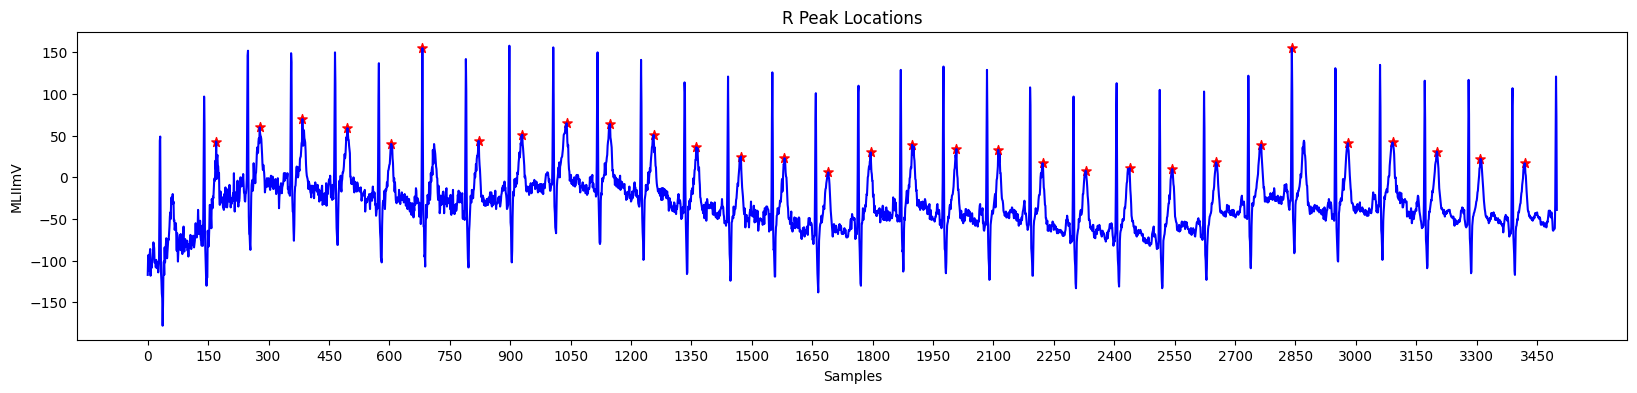

In [ ]:
# Convert ecg signal to numpy array
signal = ecg.iloc[:,1].to_numpy()

# Find the R peak locations
hr = heart_rate(signal,annotation.fs)
result = hr.find_r_peaks()
result = np.array(result)

# Clip the x locations less than 0 (Learning Phase)
result = result[result > 0]

# Calculate the heart rate
heartRate = (60*annotation.fs)/np.average(np.diff(result[1:]))
print("Heart Rate",heartRate, "BPM")

# Plotting the R peak locations in ECG signal
plt.figure(figsize = (20,4), dpi = 100)
plt.xticks(np.arange(0, len(signal)+1, 150))
plt.plot(signal, color = 'blue')
plt.scatter(result, signal[result], color = 'red', s = 50, marker= '*')
plt.xlabel('Samples')
plt.ylabel('MLIImV')
plt.title("R Peak Locations")

In [ ]:
def get_RRI(r_peaks, sampling_rate):
    """
    Compute RR Intervals (RRI) from R-peak indices.

    Parameters:
    - r_peaks (list or np.array): Indices of detected R-peaks.
    - sampling_rate (float): Sampling frequency in Hz.

    Returns:
    - np.array: RR intervals in seconds.
    """
    # Sort and ensure unique peaks
    r_peaks = sorted(set(r_peaks))

    if len(r_peaks) < 2:
        raise ValueError("At least two R-peaks are required to compute RR intervals.")

    # Calculate RR intervals in seconds
    rri = np.diff(r_peaks) / sampling_rate

    return rri

# Convert ecg signal to numpy array
signal = ecg.iloc[:,1].to_numpy()
hr = heart_rate(signal, annotation.fs)
r_peaks = hr.find_r_peaks()

# Compute RR intervals
rri = get_RRI(r_peaks, annotation.fs)
print("RR Intervals (s):", rri)

NameError: name 'heart_rate' is not defined

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, fs):
    # Low-pass filter (cutoff 11 Hz)
    b_lp, a_lp = butter(1, 11 / (0.5 * fs), btype='low')
    low_passed = filtfilt(b_lp, a_lp, signal)

    # High-pass filter (cutoff 5 Hz)
    b_hp, a_hp = butter(1, 5 / (0.5 * fs), btype='high')
    bandpassed = filtfilt(b_hp, a_hp, low_passed)

    return bandpassed


In [ ]:
def pan_tompkins_enhanced(ecg, fs):
    ecg = ecg - np.mean(ecg)
    filtered = bandpass_filter(ecg, fs)

    h = np.array([1, 2, 0, -2, -1]) * (fs / 8.0)
    diff = np.convolve(filtered, h, mode='same')
    squared = diff ** 2
    window_size = int(0.150 * fs)
    mwa = np.convolve(squared, np.ones(window_size) / window_size, mode='same')

    min_distance = int(0.2 * fs)
    peaks, _ = find_peaks(mwa, distance=min_distance)

    sig_lev = np.max(mwa[:2 * fs]) * 0.25
    noise_lev = np.max(mwa[:2 * fs]) * 0.5
    threshold = noise_lev + 0.25 * (sig_lev - noise_lev)

    qrs_peaks, rr_intervals = [], []
    recent_rr, last_qrs = 0, -fs

    for i in peaks:
        peak_val = mwa[i]
        if peak_val > threshold:
            if qrs_peaks:
                slope1 = np.max(diff[qrs_peaks[-1] - 10:qrs_peaks[-1] + 10])
                slope2 = np.max(diff[i - 10:i + 10])
                if slope2 < 0.5 * slope1:
                    noise_lev = 0.125 * peak_val + 0.875 * noise_lev
                    threshold = noise_lev + 0.25 * (sig_lev - noise_lev)
                    continue
            qrs_peaks.append(i)
            sig_lev = 0.25 * peak_val + 0.75 * sig_lev
            if len(qrs_peaks) > 1:
                rr = i - qrs_peaks[-2]
                rr_intervals.append(rr)
                if len(rr_intervals) >= 8:
                    recent_rr = np.mean(rr_intervals[-8:])
        else:
            noise_lev = 0.125 * peak_val + 0.875 * noise_lev

        threshold = noise_lev + 0.25 * (sig_lev - noise_lev)

    if len(qrs_peaks) > 1 and recent_rr > 0:
        missed = []
        for j in range(len(qrs_peaks) - 1):
            rr_gap = qrs_peaks[j + 1] - qrs_peaks[j]
            if rr_gap > 1.66 * recent_rr:
                seg = mwa[qrs_peaks[j] + int(0.2 * fs):qrs_peaks[j + 1] - int(0.2 * fs)]
                local_max = np.argmax(seg)
                missed_peak = qrs_peaks[j] + int(0.2 * fs) + local_max
                missed.append(missed_peak)
        qrs_peaks.extend(missed)
        qrs_peaks = sorted(qrs_peaks)

    return np.array(qrs_peaks)


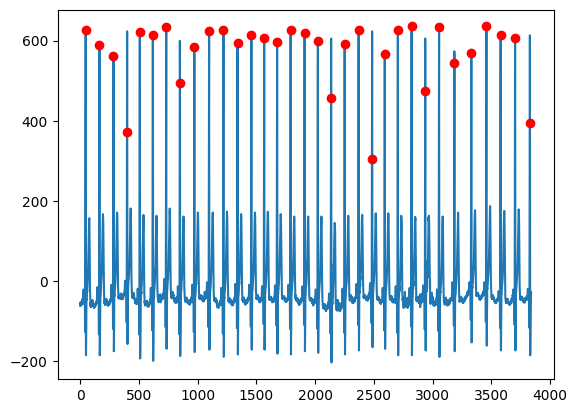

In [ ]:
ecg = pd.DataFrame(np.array([list(range(len(record.adc()))),record.adc()[:,0]]).T,columns=['TimeStamp','ecg'])
r_peaks = pan_tompkins_enhanced(ecg['ecg'].values, annotation.fs)

plt.plot(ecg['TimeStamp'], ecg['ecg'])
plt.plot(ecg['TimeStamp'].iloc[r_peaks], ecg['ecg'].iloc[r_peaks], 'ro')
plt.show()


In [ ]:
def refine_r_peaks(original_ecg, coarse_peaks, fs, window_ms=100):
    refined_peaks = []
    half_window = int((window_ms / 1000) * fs / 2)
    for peak in coarse_peaks:
        start = max(0, peak - half_window)
        end = min(len(original_ecg), peak + half_window)
        refined = start + np.argmax(original_ecg[start:end])
        refined_peaks.append(refined)
    return np.array(refined_peaks)


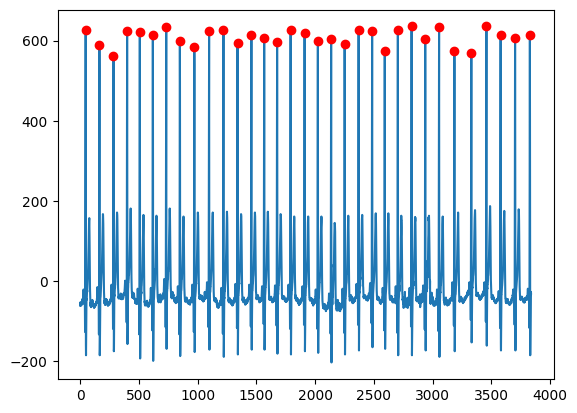

In [ ]:
refined_peaks = refine_r_peaks(ecg['ecg'].values, r_peaks, fs=250)

plt.plot(ecg['ecg'].values)
plt.plot(refined_peaks, ecg['ecg'].values[refined_peaks], 'ro')


In [ ]:
def get_RRI(r_peaks, sampling_rate):
    """
    Compute RR Intervals (RRI) from R-peak indices.

    Parameters:
    - r_peaks (list or np.array): Indices of detected R-peaks.
    - sampling_rate (float): Sampling frequency in Hz.

    Returns:
    - np.array: RR intervals in seconds.
    """
    # Sort and ensure unique peaks
    r_peaks = sorted(set(r_peaks))

    if len(r_peaks) < 2:
        raise ValueError("At least two R-peaks are required to compute RR intervals.")

    # Calculate RR intervals in seconds
    rri = np.diff(r_peaks)

    return rri


# Compute RR intervals
rri = get_RRI(refined_peaks, annotation.fs)
print("RR Intervals (s):", rri)

RR Intervals (s): [117 120 116 108 111 114 116 123 126 122 120 118 109 110 115 119 113 113
 115 119 115 107 112 117 116 118 130 144 129 121 123 126]


In [ ]:
import numpy as np

def find_preaf(data, AF_ini, fs, dis_thresh, tw, mean_rri, get_RRI):
    """
    Identifies the start index of the pre-atrial fibrillation (pre-AF) phase.

    Parameters:
        data (np.ndarray): ECG data vector.
        AF_ini (int): Index where AF starts in the data.
        fs (int): Sampling frequency in Hz.
        dis_thresh (float): Coefficient of variation threshold for R-R intervals.
        tw (float): Time window for R-R interval calculation (in seconds).
        mean_rri (float): Mean R-R interval over the dataset.
        get_RRI (function): Function to compute RRI segments given ECG data.

    Returns:
        int: Start index for the pre-AF phase.
    """

    m = 60 * fs  # One minute in samples
    pre_af_ini = 0
    flag = True
    count = 1

    # Initial search interval: last 5 minutes of data
    interval_start = len(data) - 5 * m
    interval_end = len(data)

    while flag and interval_start > 0:
        x = data[interval_start:interval_end]

        # Compute R-R intervals
        RRI_segments = get_RRI(x, fs, tw)

        # Compute std deviation for each RRI segment
        std_RRI = np.array([np.std(rri) for rri in RRI_segments])

        # Coefficient of variation
        coef_var = std_RRI / mean_rri

        if np.median(coef_var) <= dis_thresh:
            flag = False
            pre_af_ini = AF_ini - count * 5 * m
        else:
            count += 1
            interval_end = len(data) - (count - 1) * 5 * m + 30 * fs
            interval_start = len(data) - count * 5 * m

    return pre_af_ini


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def rp_plot(rri, delay, embedding_dim):
    """
    Generate a recurrence plot from RRI time series.

    Parameters:
    - rri: array-like, RR intervals (in seconds)
    - delay: int, time delay (in samples)
    - embedding_dim: int, embedding dimension

    Returns:
    - RP: 2D numpy array, recurrence matrix (distance matrix)
    """
    N = len(rri)
    Nrp = N - (embedding_dim - 1) * delay

    if Nrp <= 0:
        raise ValueError("Not enough RRI points for given embedding parameters.")

    # Phase space reconstruction
    embedded = np.array([
        rri[i : i + delay * embedding_dim : delay]
        for i in range(Nrp)
    ])

    # Compute Euclidean distance matrix
    distances = squareform(pdist(embedded, metric='euclidean'))

    return distances


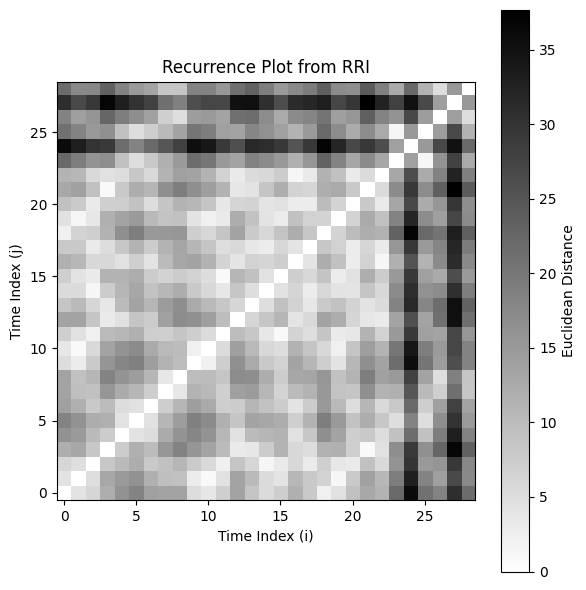

In [ ]:
embedding_dim_rri = 2
delay_rri = 3

embedding_dim_ecg = 5
delay_ecg = 6

rri = get_RRI(refined_peaks, annotation.fs)
Recurrence_Plot_RRI = rp_plot(rri, delay_rri, embedding_dim_rri)

# Plot the recurrence plot
plt.figure(figsize=(6, 6))
plt.imshow(Recurrence_Plot_RRI, cmap='binary', origin='lower', interpolation='none')
plt.title('Recurrence Plot from RRI')
plt.xlabel('Time Index (i)')
plt.ylabel('Time Index (j)')
plt.colorbar(label='Euclidean Distance')
plt.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np

def test_rp_plot():
    from scipy.spatial.distance import pdist, squareform

    def rp_plot(rri, delay, embedding_dim):
        N = len(rri)
        Nrp = N - (embedding_dim - 1) * delay
        if Nrp <= 0:
            raise ValueError("Not enough RRI points for given embedding parameters.")
        embedded = np.array([
            rri[i : i + delay * embedding_dim : delay]
            for i in range(Nrp)
        ])
        return squareform(pdist(embedded, metric='euclidean'))

    # Synthetic RRI time series (in seconds)
    rri =

    delay = 1
    embedding_dim = 3

    RP = rp_plot(rri, delay, embedding_dim)

    # --- Assertions ---
    expected_size = len(rri) - (embedding_dim - 1) * delay
    assert RP.shape == (expected_size, expected_size), "Unexpected RP shape"

    assert np.allclose(RP, RP.T, atol=1e-6), "RP matrix is not symmetric"

    assert np.allclose(np.diag(RP), 0), "Diagonal of RP is not zero"

    print("test_rp_plot passed!")

# Run the test
test_rp_plot()


test_rp_plot passed!
